<a href="https://colab.research.google.com/github/ds4ph-bme/project-8-HerambGupta/blob/main/project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question 1**


##Part A
X will have two non principal components; Since $X=(x_1,x_2)$ 

##Part B

In [ ]:
import numpy as np
ya=1/2
yb=1/2
cov_a=np.array([[1, 1],[1,2]])
cov_b=np.array([[1,0],[0,1]])
cov_x=ya*cov_a+yb*cov_b
print('Covariance of X is {0}'.format(cov_x))

Covariance of X is [[1.  0.5]
 [0.5 1.5]]


##Part C

In [ ]:
from numpy.linalg import eig
w,v=eig(cov_x)
print('E-value:', w)
print('E-vector', v)

E-value: [0.69098301 1.80901699]
E-vector [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


##Part D

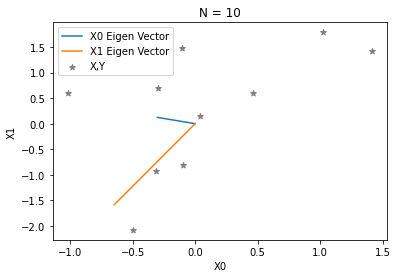

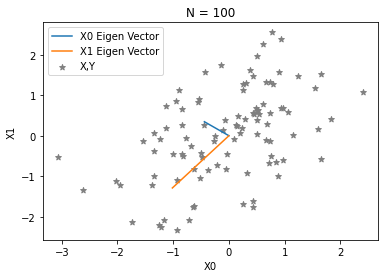

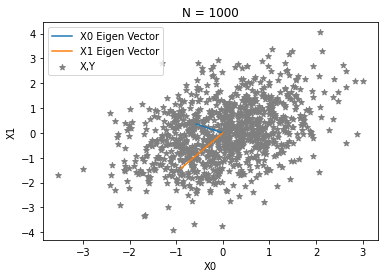

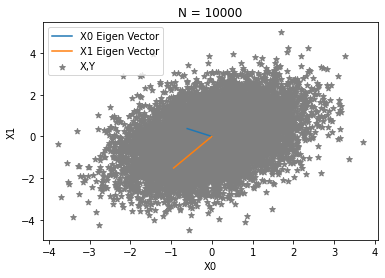

In [ ]:
import matplotlib.pyplot as plt
def PCA(n):
  x,y =np.random.multivariate_normal([0,0],cov_x,n).T
  eval,evec=eig(np.cov(x,y))
  plt.scatter(x,y,marker='*',c='tab:gray')
  plt.plot([0,(eval[0]*evec[:,0])[0]],[0,(eval[0]*evec[:,0])[1]])
  plt.plot([0,(eval[1]*evec[:,1])[0]],[0,(eval[1]*evec[:,1])[1]])
  plt.legend(['X0 Eigen Vector','X1 Eigen Vector','X,Y'])
  plt.xlabel('X0')
  plt.ylabel('X1')
  plt.title('N = {0}'.format(n))

n=[10, 100,1000,10000]
for i in range(4):
  plt.figure()
  PCA(n[i])


##Part E

In [ ]:
h=10000
d=[]
r=[]
u=[]
for i in range(2,h):
  x,y =np.random.multivariate_normal([0,0],cov_x,i).T
  eval,evec=eig(np.cov(x,y))
  d.append(np.linalg.norm(eval-w))
  r.append(np.linalg.norm(evec-v))
  u.append(np.linalg.norm(cov_x-np.cov(x,y)))

Text(0.5, 0, 'n')

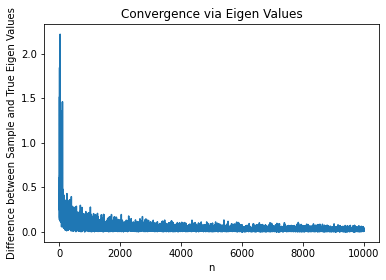

In [ ]:
plt.plot(d)
plt.title('Convergence via Eigen Values')
plt.ylabel('Difference between Sample and True Eigen Values')
plt.xlabel('n')

Text(0.5, 0, 'n')

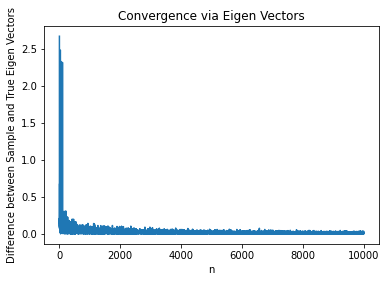

In [ ]:
plt.plot(r)
plt.title('Convergence via Eigen Vectors')
plt.ylabel('Difference between Sample and True Eigen Vectors')
plt.xlabel('n')

Thus we can see that as $n \rightarrow \infty $ the eigen vector and eigen values of the sample covariance matrix converges to the truth

##Part F

When we see that the eigen vectors and eigen values of the sample covariance matrix converges to the truth, we can say that the Covariance of the sample matrix also converges to the truth i.e. overall covariance of X.



Text(0.5, 0, 'n')

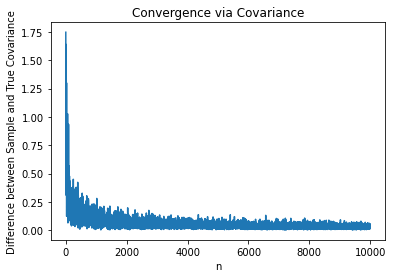

In [ ]:
plt.plot(u)
plt.title('Convergence via Covariance')
plt.ylabel('Difference between Sample and True Covariance')
plt.xlabel('n')

##**Question 2**


##Part A

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
gm=pd.read_csv('https://raw.githubusercontent.com/ds4ph-bme/project-8-HerambGupta/main/gmm.csv?token=APH6HWMJNLLG6EWZXUYO5WLBPMLAC')
s=pd.read_csv('https://raw.githubusercontent.com/ds4ph-bme/project-8-HerambGupta/main/swissroll.csv?token=APH6HWNMAFYVQD75NJVJS6LBPMLCY')
gmm=gm.drop(columns=['Unnamed: 0'],axis=1)
swr=s.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
def clustering(x,n):
  kmeans_g=KMeans(n_clusters=n, random_state=0)
  c=kmeans_g.fit_predict(x)
  for i in range(n):
    f=x[c==i]
    plt.scatter(f.iloc[:,0],f.iloc[:,1])

Text(0.5, 1.0, 'SWR')

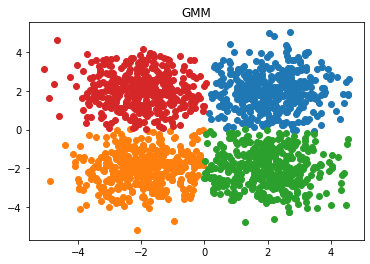

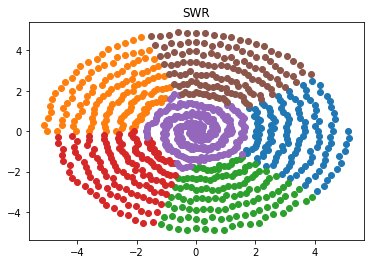

In [ ]:
plt.figure()
clustering(gmm,4)
plt.title('GMM')
plt.figure()
clustering(swr,6)
plt.title('SWR')

##Part B

Text(0.5, 1.0, 'Silhoutte Method Analysis for GMM')

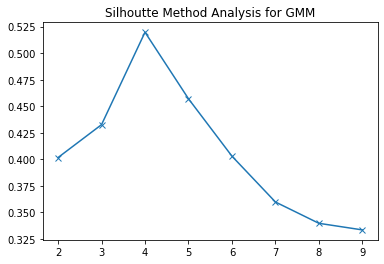

In [ ]:
from sklearn.metrics import silhouette_score

#Cluster Number Identification
d=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,random_state=0)
  c=kmeans.fit_predict(gmm)
  s=silhouette_score(gmm,c)
  d.append(s)
  #d.append(kmeans.inertia_)
plt.plot(range(2,10),d,'x-')
plt.title('Silhoutte Method Analysis for GMM')

Text(0.5, 1.0, 'Elbow Method Analysis for GMM')

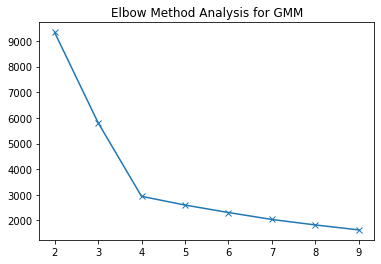

In [ ]:
#Cluster Number Identification
d=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,random_state=0)
  c=kmeans.fit_predict(gmm)
  d.append(kmeans.inertia_)
plt.plot(range(2,10),d,'x-')
plt.title('Elbow Method Analysis for GMM')

The ideal cluster number for GMM dataset as we can see from both the methods is **4** 

Text(0.5, 1.0, 'Silhoutte Method Analysis for Swissroll')

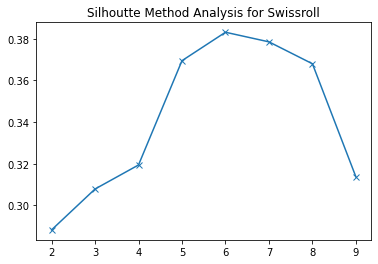

In [ ]:
d=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,random_state=0)
  c=kmeans.fit_predict(swr)
  s=silhouette_score(swr,c)
  d.append(s)
plt.plot(range(2,10),d,'x-')
plt.title('Silhoutte Method Analysis for Swissroll')

Text(0.5, 1.0, 'Elbow Method Analysis for Swissroll')

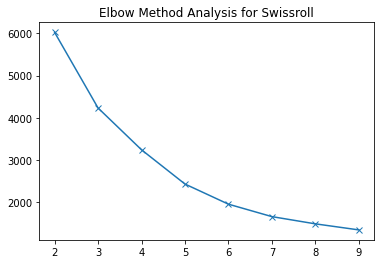

In [ ]:
#Cluster Number Identification
d=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,random_state=0)
  c=kmeans.fit_predict(swr)
  d.append(kmeans.inertia_)
plt.plot(range(2,10),d,'x-')
plt.title('Elbow Method Analysis for Swissroll')

The ideal cluster number for the Swissroll Dataset as we can see from the Silhoutte Method is **6**

##Part C

The Kmeans clustering model performs well for the GMM Dataset. We know this because the ideal number of clusters for the GMM dataset is 4 as predicted by both the methods. 

However, when we talk about the Swissroll Dataset we can see that the elbow method for analyzing the Kmeans modelling does not give a clearly visible ideal number of clusters. This along with visual analyzation of the results help us say that the Kmeans model does not perform well for the Swissroll Dataset. To improve clustering perfromance we can use other methods of clustering like the DBSCAN, Spectral Clustering, OPTICS, Feature Agglomeration Algorithm.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(swr)

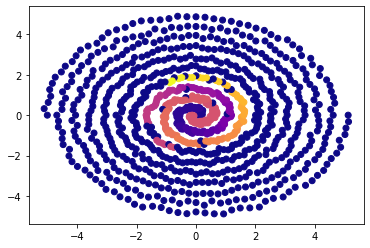

In [ ]:
plt.scatter(swr.iloc[:, 0], swr.iloc[:, 1], c=clusters, cmap="plasma")

In [ ]:
from sklearn.cluster import SpectralClustering
spec = SpectralClustering(n_clusters=6,assign_labels='discretize',random_state=0)
clusters = spec.fit_predict(swr)

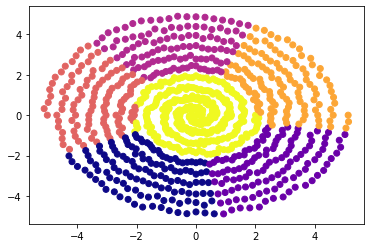

In [ ]:
plt.scatter(swr.iloc[:, 0], swr.iloc[:, 1], c=clusters, cmap="plasma")

In [ ]:
from sklearn.cluster import OPTICS
opc=OPTICS()
clusters=opc.fit_predict(swr)

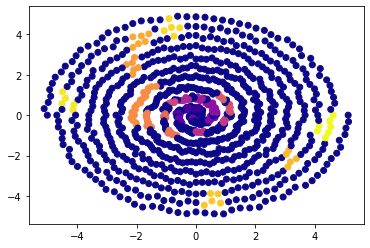

In [ ]:
plt.scatter(swr.iloc[:, 0], swr.iloc[:, 1], c=clusters, cmap="plasma")

In [ ]:
from sklearn.cluster import FeatureAgglomeration
fa=FeatureAgglomeration(n_clusters=2)
clusters=fa.fit_transform(swr)

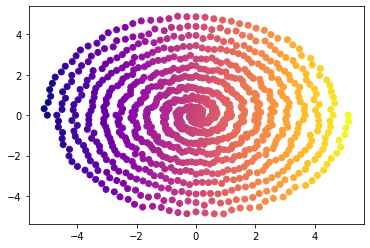

In [ ]:
plt.scatter(swr.iloc[:, 0], swr.iloc[:, 1], c=clusters[:,1], cmap="plasma")


We can see that even other methods of clustering are not able to very clearly categorize the SwissRoll Data Set. To this effect we should consider converting the points in SwissRoll to a three dimensional dataset - i.e somehow accounting it to be three dimensional. This may lead to better clustering with improved perfromance.